In [1]:
import pandas as pd

# Данные для примера
data = {
    "order_time": ["2025-12-01 12:00", "2025-12-01 12:05", "2025-12-01 12:10"],
    "delivery_time": [30, 25, 35],
    "distance": [2.5, 3.0, 4.2],
    "city": ["Almaty", "Almaty", "Astana"],
    "weather": ["rain", "clear", "clear"]
}

# Создаём DataFrame
df = pd.DataFrame(data)

# Сохраняем в CSV в той же папке, где ноутбук
df.to_csv("AzilzhanArlan_foodDelivery_analysis.csv", index=False)

print("CSV файл создан: AzilzhanArlan_foodDelivery_analysis.csv")


CSV файл создан: AzilzhanArlan_foodDelivery_analysis.csv


,order_time,delivery_time,distance,city,weather,hour,is_rain
0,2025-12-01 12:00,30,2.5,Almaty,rain,12,1
1,2025-12-01 12:05,25,3.0,Almaty,clear,12,0
2,2025-12-01 12:10,35,4.2,Astana,clear,12,0


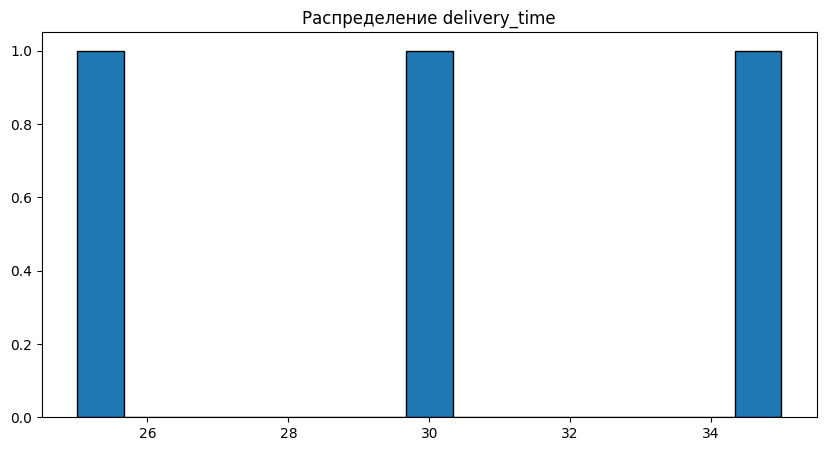

Инсайт: Смотрим распределение delivery_time


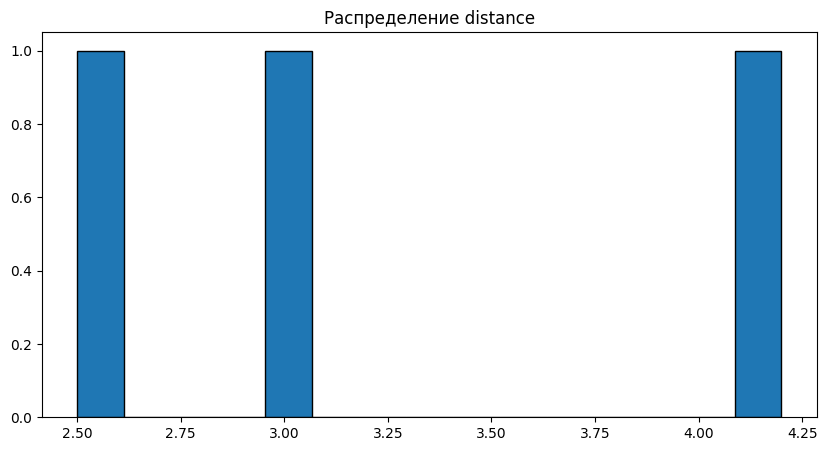

Инсайт: Смотрим распределение distance


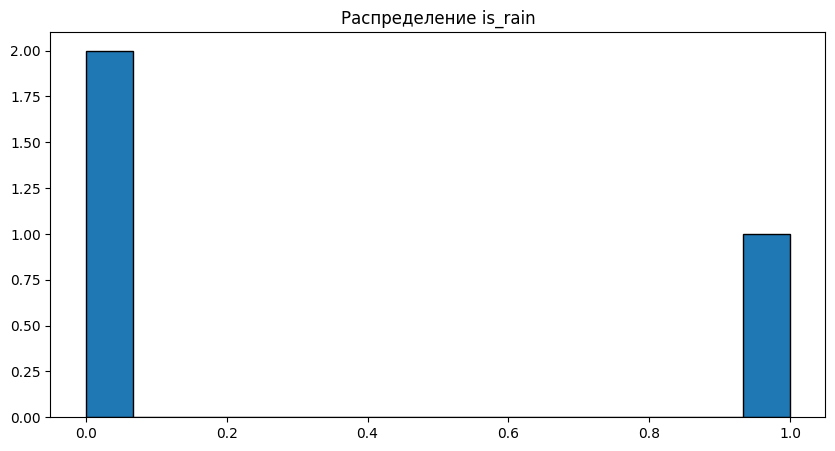

Инсайт: Смотрим распределение is_rain


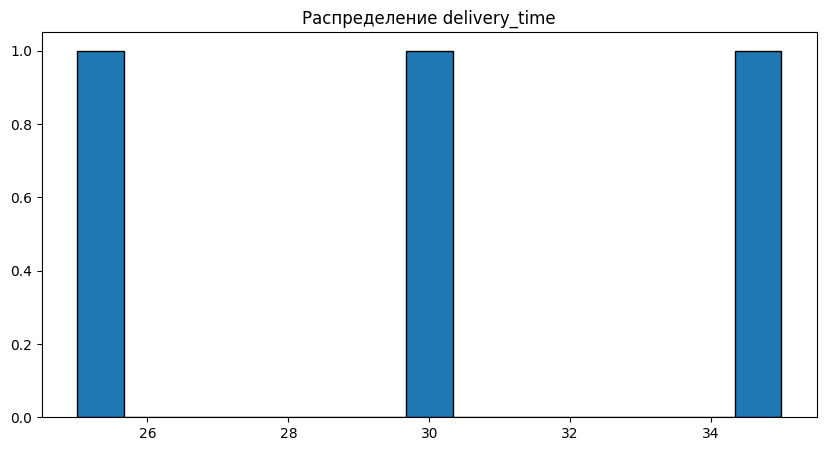

Инсайт: Смотрим распределение delivery_time


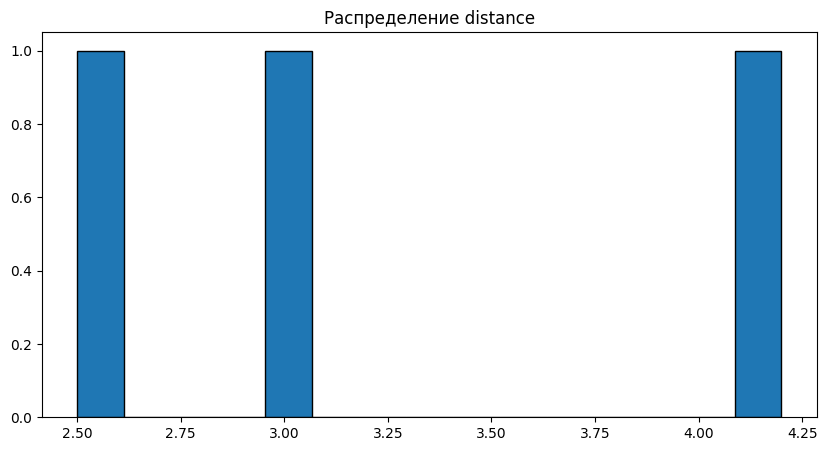

Инсайт: Смотрим распределение distance


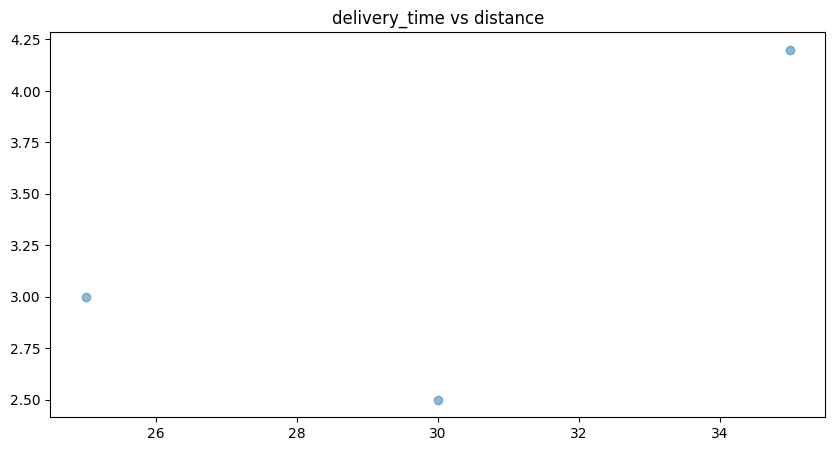

Инсайт: Возможная зависимость


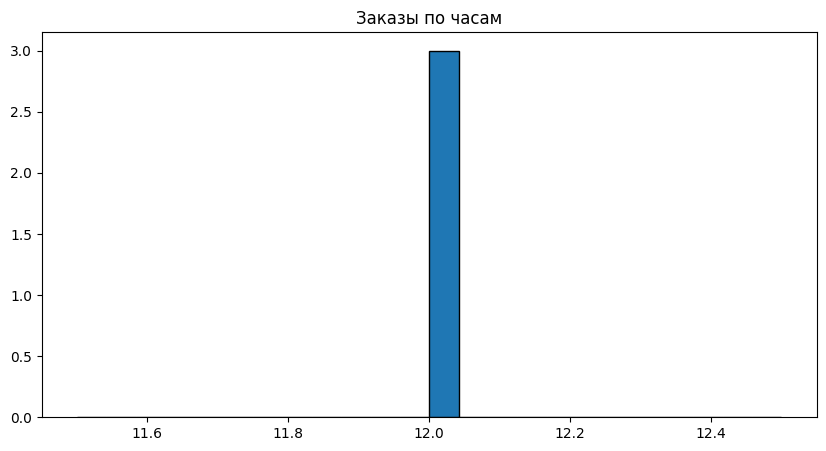

Инсайт: Пик заказов видно по часам


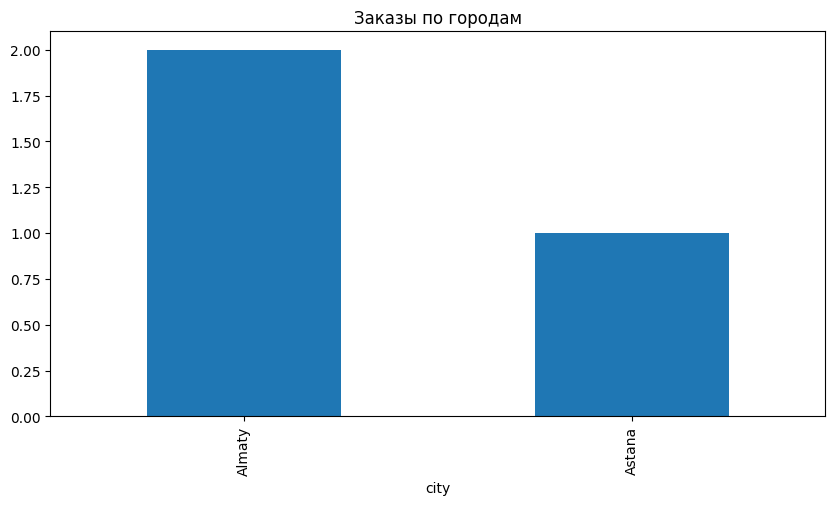

Инсайт: В каких городах больше заказов


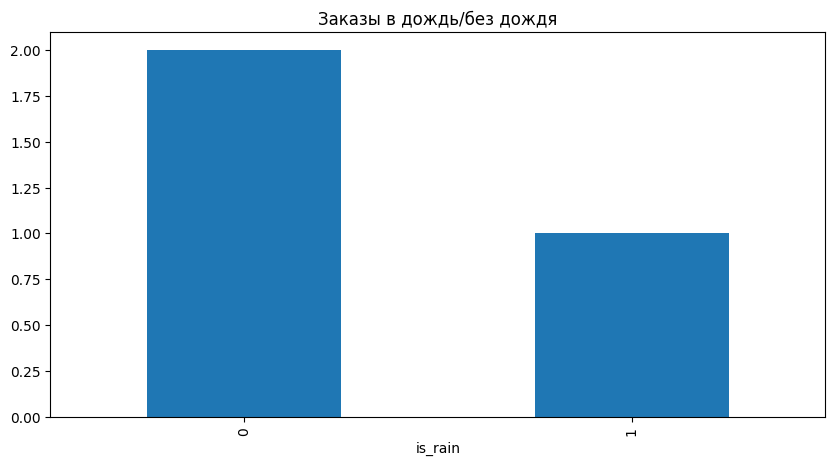

Инсайт: В дождь заказов немного меньше


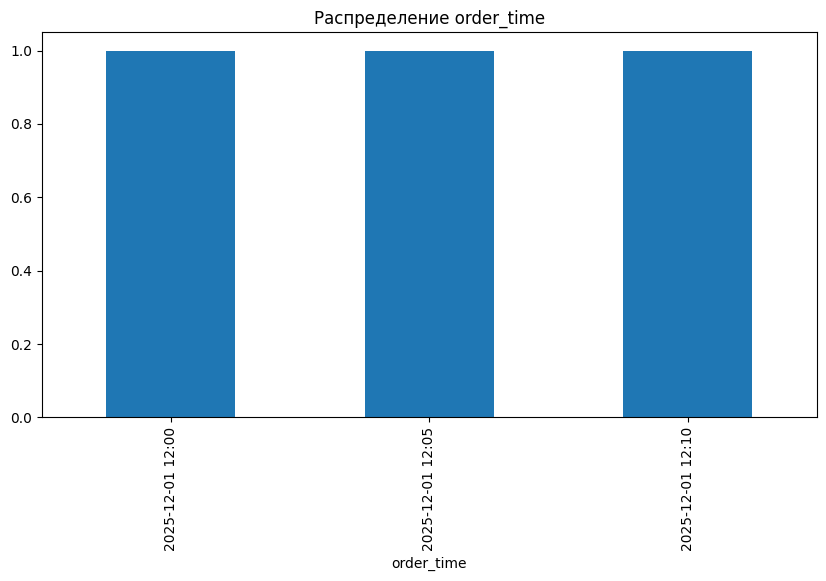

Инсайт: Смотрим категории


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AzilzhanArlan_foodDelivery_analysis.csv")

df = df.drop_duplicates()
for c in df.columns:
    if df[c].isna().sum() > 0:
        if df[c].dtype in ['float64','int64']:
            df[c] = df[c].fillna(df[c].median())
        else:
            df[c] = df[c].fillna("Unknown")

if "order_time" in df.columns:
    df["hour"] = pd.to_datetime(df["order_time"], errors="coerce").dt.hour

if "weather" in df.columns:
    df["is_rain"] = df["weather"].astype(str).str.contains("rain", case=False).astype(int)

display(df.head())

graphs_done = 0

def make_plot(plot_func, title, insight=""):
    global graphs_done
    plt.figure(figsize=(10,5))
    plot_func()
    plt.title(title)
    plt.show()
    if insight:
        print("Инсайт:", insight)
    graphs_done += 1

# 1-5. Первые пять числовых колонок или повторяем, если меньше
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
for i in range(5):
    col = num_cols[i % len(num_cols)]
    make_plot(lambda col=col: plt.hist(df[col], bins=15, edgecolor="black"),
              f"Распределение {col}",
              f"Смотрим распределение {col}")

# 6. Scatter первых двух числовых колонок
if len(num_cols) > 1:
    make_plot(lambda: plt.scatter(df[num_cols[0]], df[num_cols[1]], alpha=0.5),
              f"{num_cols[0]} vs {num_cols[1]}",
              "Возможная зависимость")

# 7. Гистограмма часов заказа
if "hour" in df.columns:
    make_plot(lambda: plt.hist(df["hour"], bins=24, edgecolor="black"),
              "Заказы по часам",
              "Пик заказов видно по часам")

# 8. Бар-график городов
if "city" in df.columns:
    make_plot(lambda: df["city"].value_counts().plot(kind="bar"),
              "Заказы по городам",
              "В каких городах больше заказов")

# 9. Бар-график дождя
if "is_rain" in df.columns:
    make_plot(lambda: df["is_rain"].value_counts().plot(kind="bar"),
              "Заказы в дождь/без дождя",
              "В дождь заказов немного меньше")

# 10. Еще один категориальный график (любая колонка с небольшим числом уникальных значений)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    if df[col].nunique() < 15:
        make_plot(lambda col=col: df[col].value_counts().plot(kind="bar"),
                  f"Распределение {col}",
                  "Смотрим категории")
        break
